In [12]:
# Import all important libraries


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

import logging

### Load the Data

In [13]:
store_data = pd.read_csv("cleaned_df_store.csv")
train_data = pd.read_csv("cleaned_df_train.csv")
test_data = pd.read_csv("cleaned_df_test.csv")

In [14]:
# columns for each data
print(f'\t Store Columns \n{list(store_data.columns)}\n')
print(f'\t Train Columns \n{list(train_data.columns)}\n')
print(f'\t Test Columns\n {list(test_data.columns)}\n')


	 Store Columns 
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval0', 'PromoInterval1', 'PromoInterval2', 'PromoInterval3']

	 Train Columns 
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Test Columns
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']



In [15]:
# shape for each data
print(f'\t Store shape: {store_data.shape}\n')
print(f'\t Train shape: {train_data.shape}\n')
print(f'\t Test shape: {test_data.shape}\n')

	 Store shape: (1115, 13)

	 Train shape: (1017209, 9)

	 Test shape: (41088, 8)



In [16]:
# Now we merge store data n train data 

df_train_store = pd.merge(train_data.reset_index(),store_data,how='inner',on ='Store')
df_train_store.info()              

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   index                      1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  float64
 5   Customers                  1017209 non-null  float64
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  int64  
 9   SchoolHoliday              1017209 non-null  float64
 10  StoreType                  1017209 non-null  int64  
 11  Assortment                 1017209 non-null  int64  
 12  CompetitionDistance        1017209 non-null  float64
 13  CompetitionO

### Data Exploration and Extraction

Spliting a date column into separate day,month,year column in pandas.

In [17]:
# convert date in datetimeindex format

df_train_store['Date'] = pd.DatetimeIndex(df_train_store['Date'])
df_train_store['Year'] = pd.DatetimeIndex(df_train_store['Date']).year
df_train_store['Month'] = pd.DatetimeIndex(df_train_store['Date']).month
df_train_store['Day'] = pd.DatetimeIndex(df_train_store['Date']).day
df_train_store['WeekOfYear'] = df_train_store['Date'].dt.weekofyear


#  adding new variable
df_train_store['SalePerCustomer'] = df_train_store['Sales']/df_train_store['Customers']

df_train_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   index                      1017209 non-null  int64         
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Date                       1017209 non-null  datetime64[ns]
 4   Sales                      1017209 non-null  float64       
 5   Customers                  1017209 non-null  float64       
 6   Open                       1017209 non-null  int64         
 7   Promo                      1017209 non-null  int64         
 8   StateHoliday               1017209 non-null  int64         
 9   SchoolHoliday              1017209 non-null  float64       
 10  StoreType                  1017209 non-null  int64         
 11  Assortment                 1017209 no

In [18]:
df_train_store['SalePerCustomer'].describe()


count    844340.000000
mean          9.732179
std           2.585977
min           0.000000
25%           8.007083
50%           9.431728
75%          11.006862
max          51.694444
Name: SalePerCustomer, dtype: float64

In [19]:
# print max n min year in data

print(df_train_store['Year'].min())
print(df_train_store['Year'].max())


2013
2015


We can see the range of the years for this data is between 2013-2015

In [20]:
df_train_store.isnull().sum()

index                             0
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval0                    0
PromoInterval1                    0
PromoInterval2                    0
PromoInterval3                    0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
SalePerCustomer              172869
dtype: int64

In [22]:
# Filling null with median
df_train_store['SalePerCustomer'].fillna(df_train_store['SalePerCustomer'].median(), inplace = True)

df_train_store.isnull().sum()

index                        0
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval0               0
PromoInterval1               0
PromoInterval2               0
PromoInterval3               0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
SalePerCustomer              0
dtype: int64

### Checking the distribution of sales among Store types
checking for different levels of StoreType and how the main metric Sales is distributed among them.

In [23]:
df_train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
0,551627.0,5388.581349,3360.525104,0.0,3508.0,5618.0,7527.0,14049.0
1,15830.0,7446.566203,2930.170294,0.0,5651.0,6613.0,9584.0,14049.0
2,136840.0,5485.973151,3330.664360,0.0,3789.0,5651.0,7626.0,14049.0
3,312912.0,5507.903922,3241.786147,0.0,3986.0,5746.0,7580.0,14048.0


StoreType B has the highest average of Sales among all others.

however we have much less data for it, So let's check an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one.

In [24]:
df_train_store.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
0,332745322.0,2.972487e+09
1,11921833.0,1.178791e+08
2,86573485.0,7.507006e+08
3,156566250.0,1.723489e+09


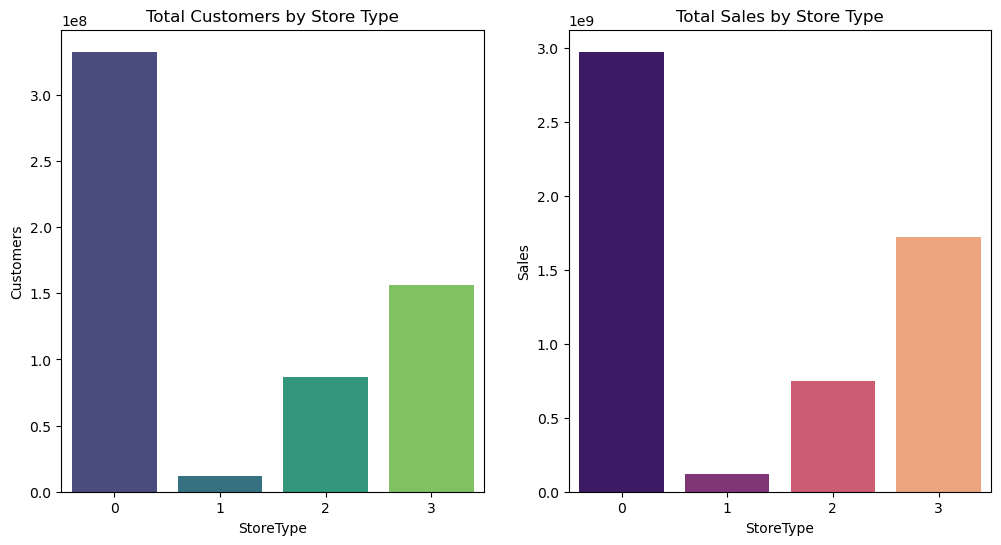

In [25]:
# Group by 'StoreType' and sum 'Customers' and 'Sales'
grouped_data = df_train_store.groupby('StoreType')['Customers', 'Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for Customers
plt.subplot(1, 2, 1)
sns.barplot(x='StoreType', y='Customers', data=grouped_data, palette='viridis')
plt.title('Total Customers by Store Type')

# Bar plot for Sales
plt.subplot(1, 2, 2)
sns.barplot(x='StoreType', y='Sales', data=grouped_data, palette='magma')
plt.title('Total Sales by Store Type')
plt.show()

StoreType A comes first and StoreType D goes on the second place in both Sales and Customers.

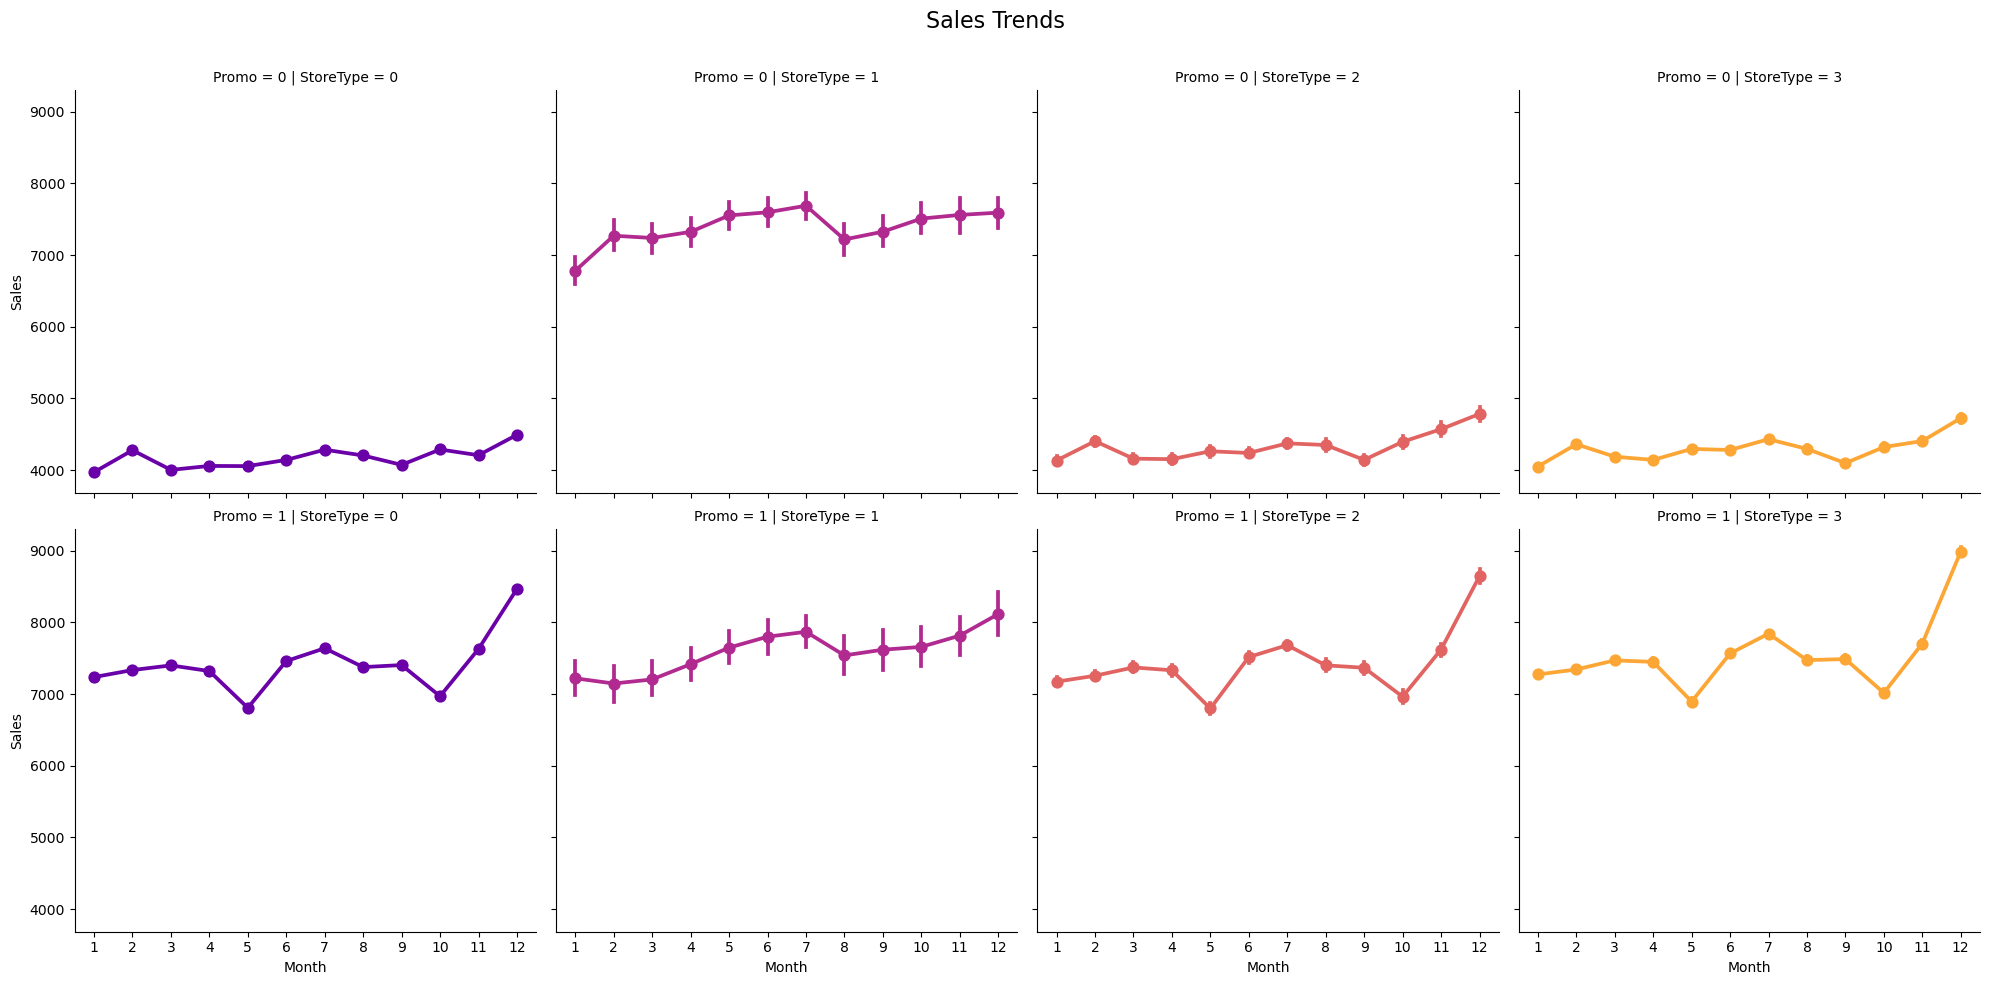

In [26]:
# Create the catplot to visualize sales trends

color = "red"
sns.catplot(data=df_train_store, x='Month', y='Sales',
            col='StoreType', 
            palette='plasma', hue='StoreType',
            row='Promo', 
            color=color, kind='point')

plt.subplots_adjust(top=0.9)
plt.suptitle('Sales Trends', fontsize=16) 

plt.show()

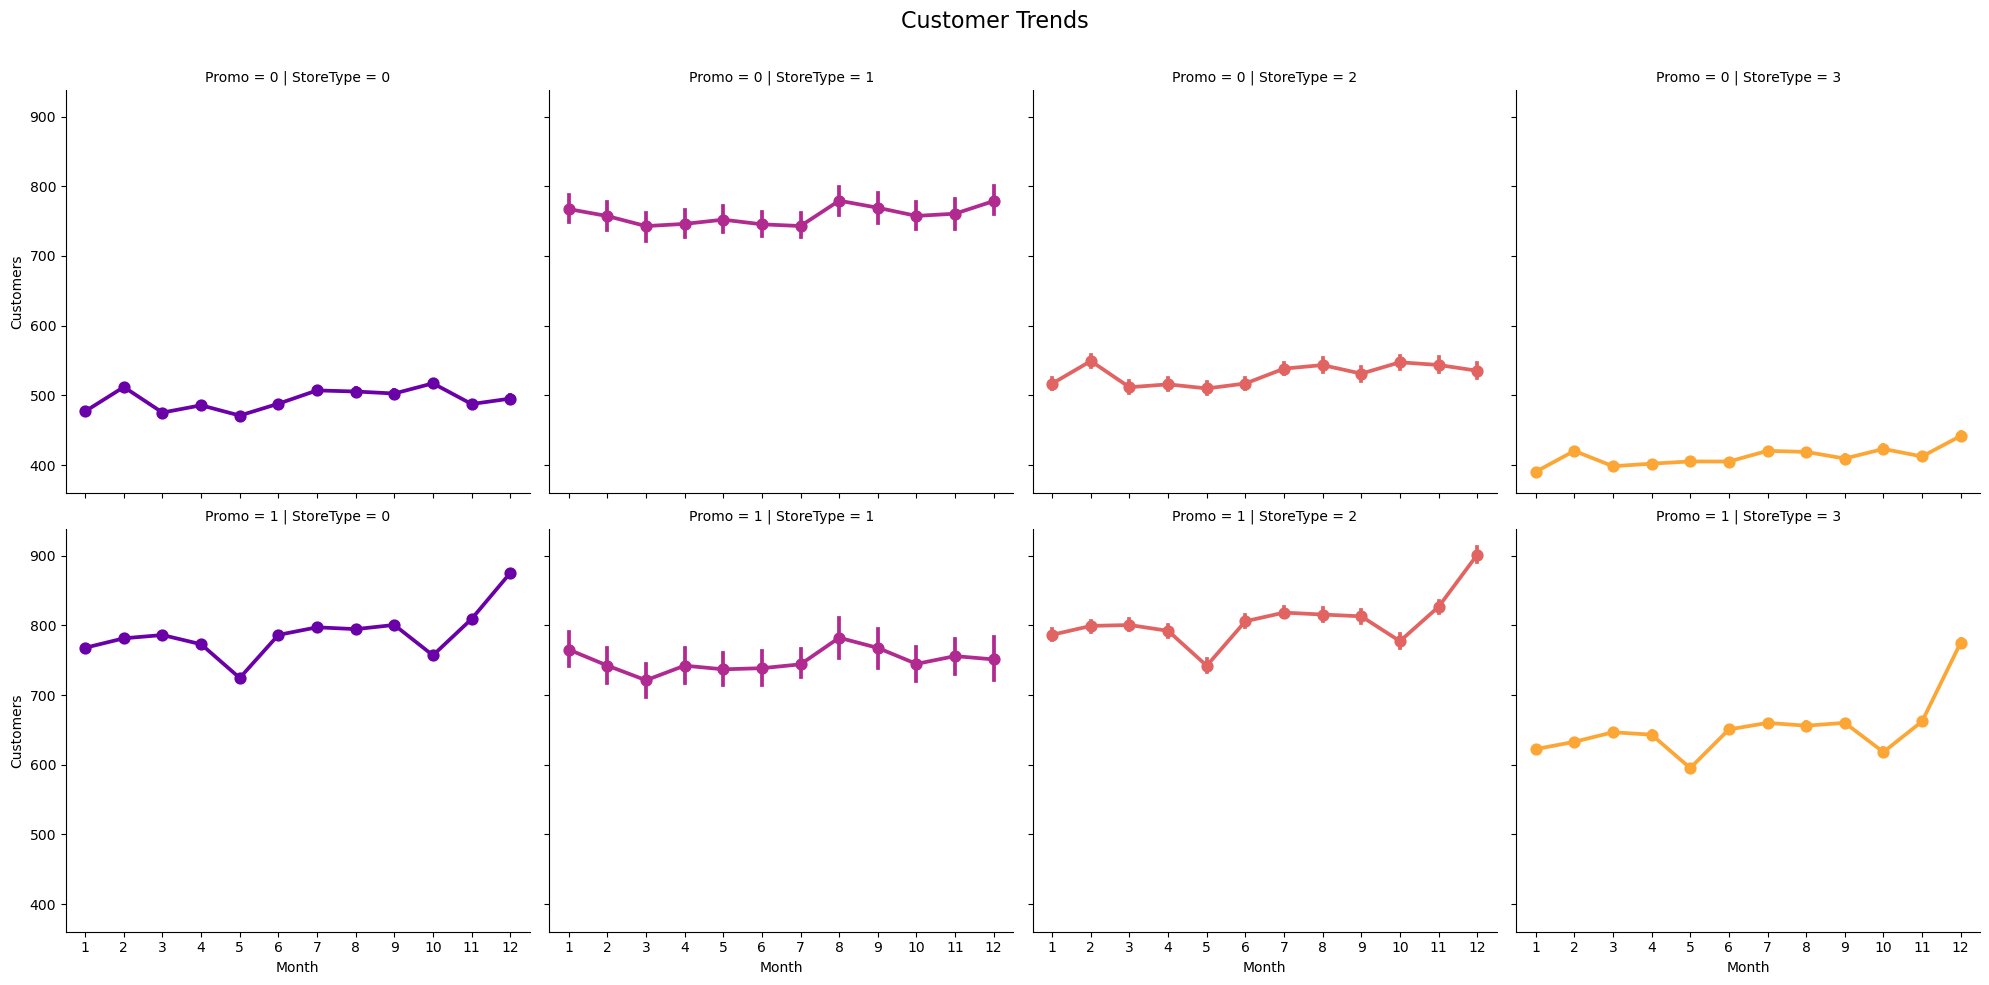

In [27]:
# Create the catplot to visualize customer trends
c = "blue"
sns.catplot(data=df_train_store, x='Month', y='Customers',
            col='StoreType',
            palette='plasma', hue='StoreType',
            row='Promo',
            kind='point', color=c)

plt.subplots_adjust(top=0.9) 
plt.suptitle('Customer Trends', fontsize=16)
plt.show()

All store types follow the same trend but at different scales depending on the presence of the (first) promotion Promo and StoreType itself (case for B).

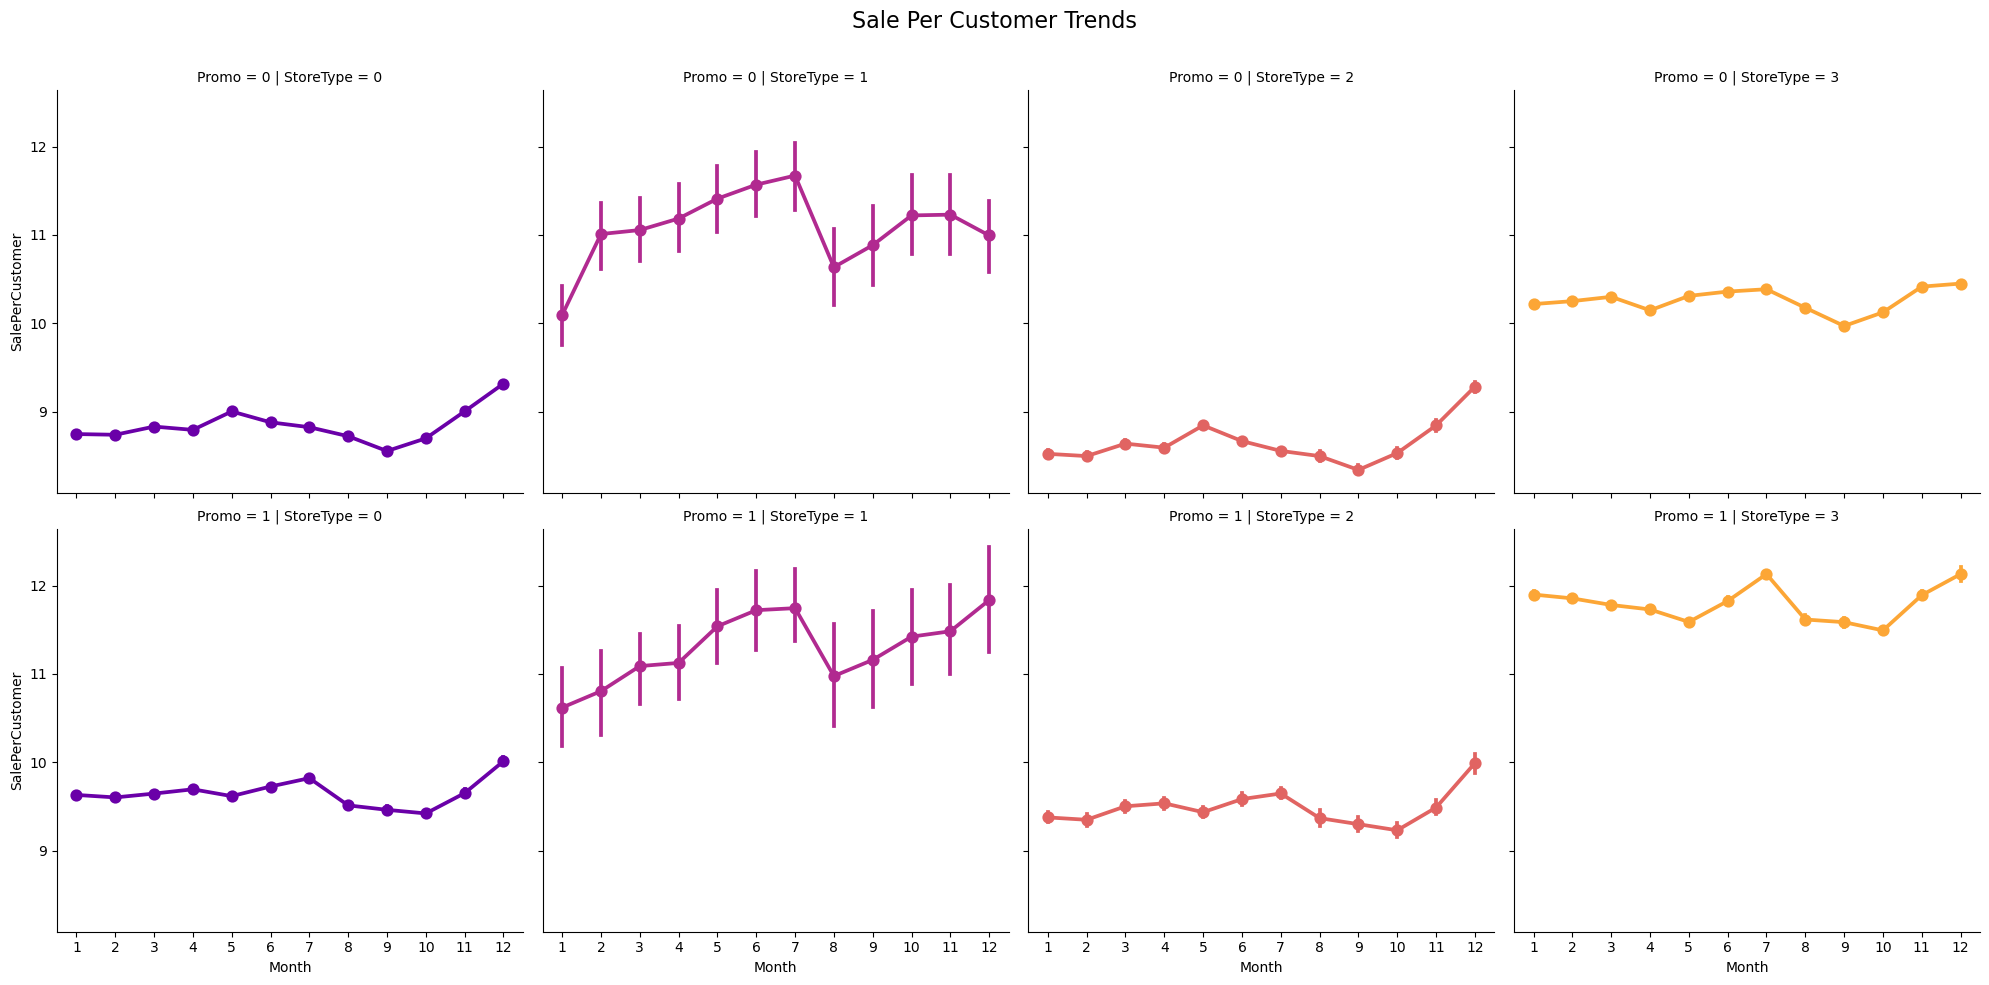

In [28]:
# Create the catplot to visualize "SalePerCustomer" trends

c = "green"
sns.catplot(data=df_train_store, x='Month', y='SalePerCustomer',
            col='StoreType',  # per store type in cols
            palette='plasma', hue='StoreType',
            row='Promo',  # per promo in the store in rows
            kind='point', color=c)

plt.subplots_adjust(top=0.9)  
plt.suptitle('Sale Per Customer Trends', fontsize=16)
plt.show()

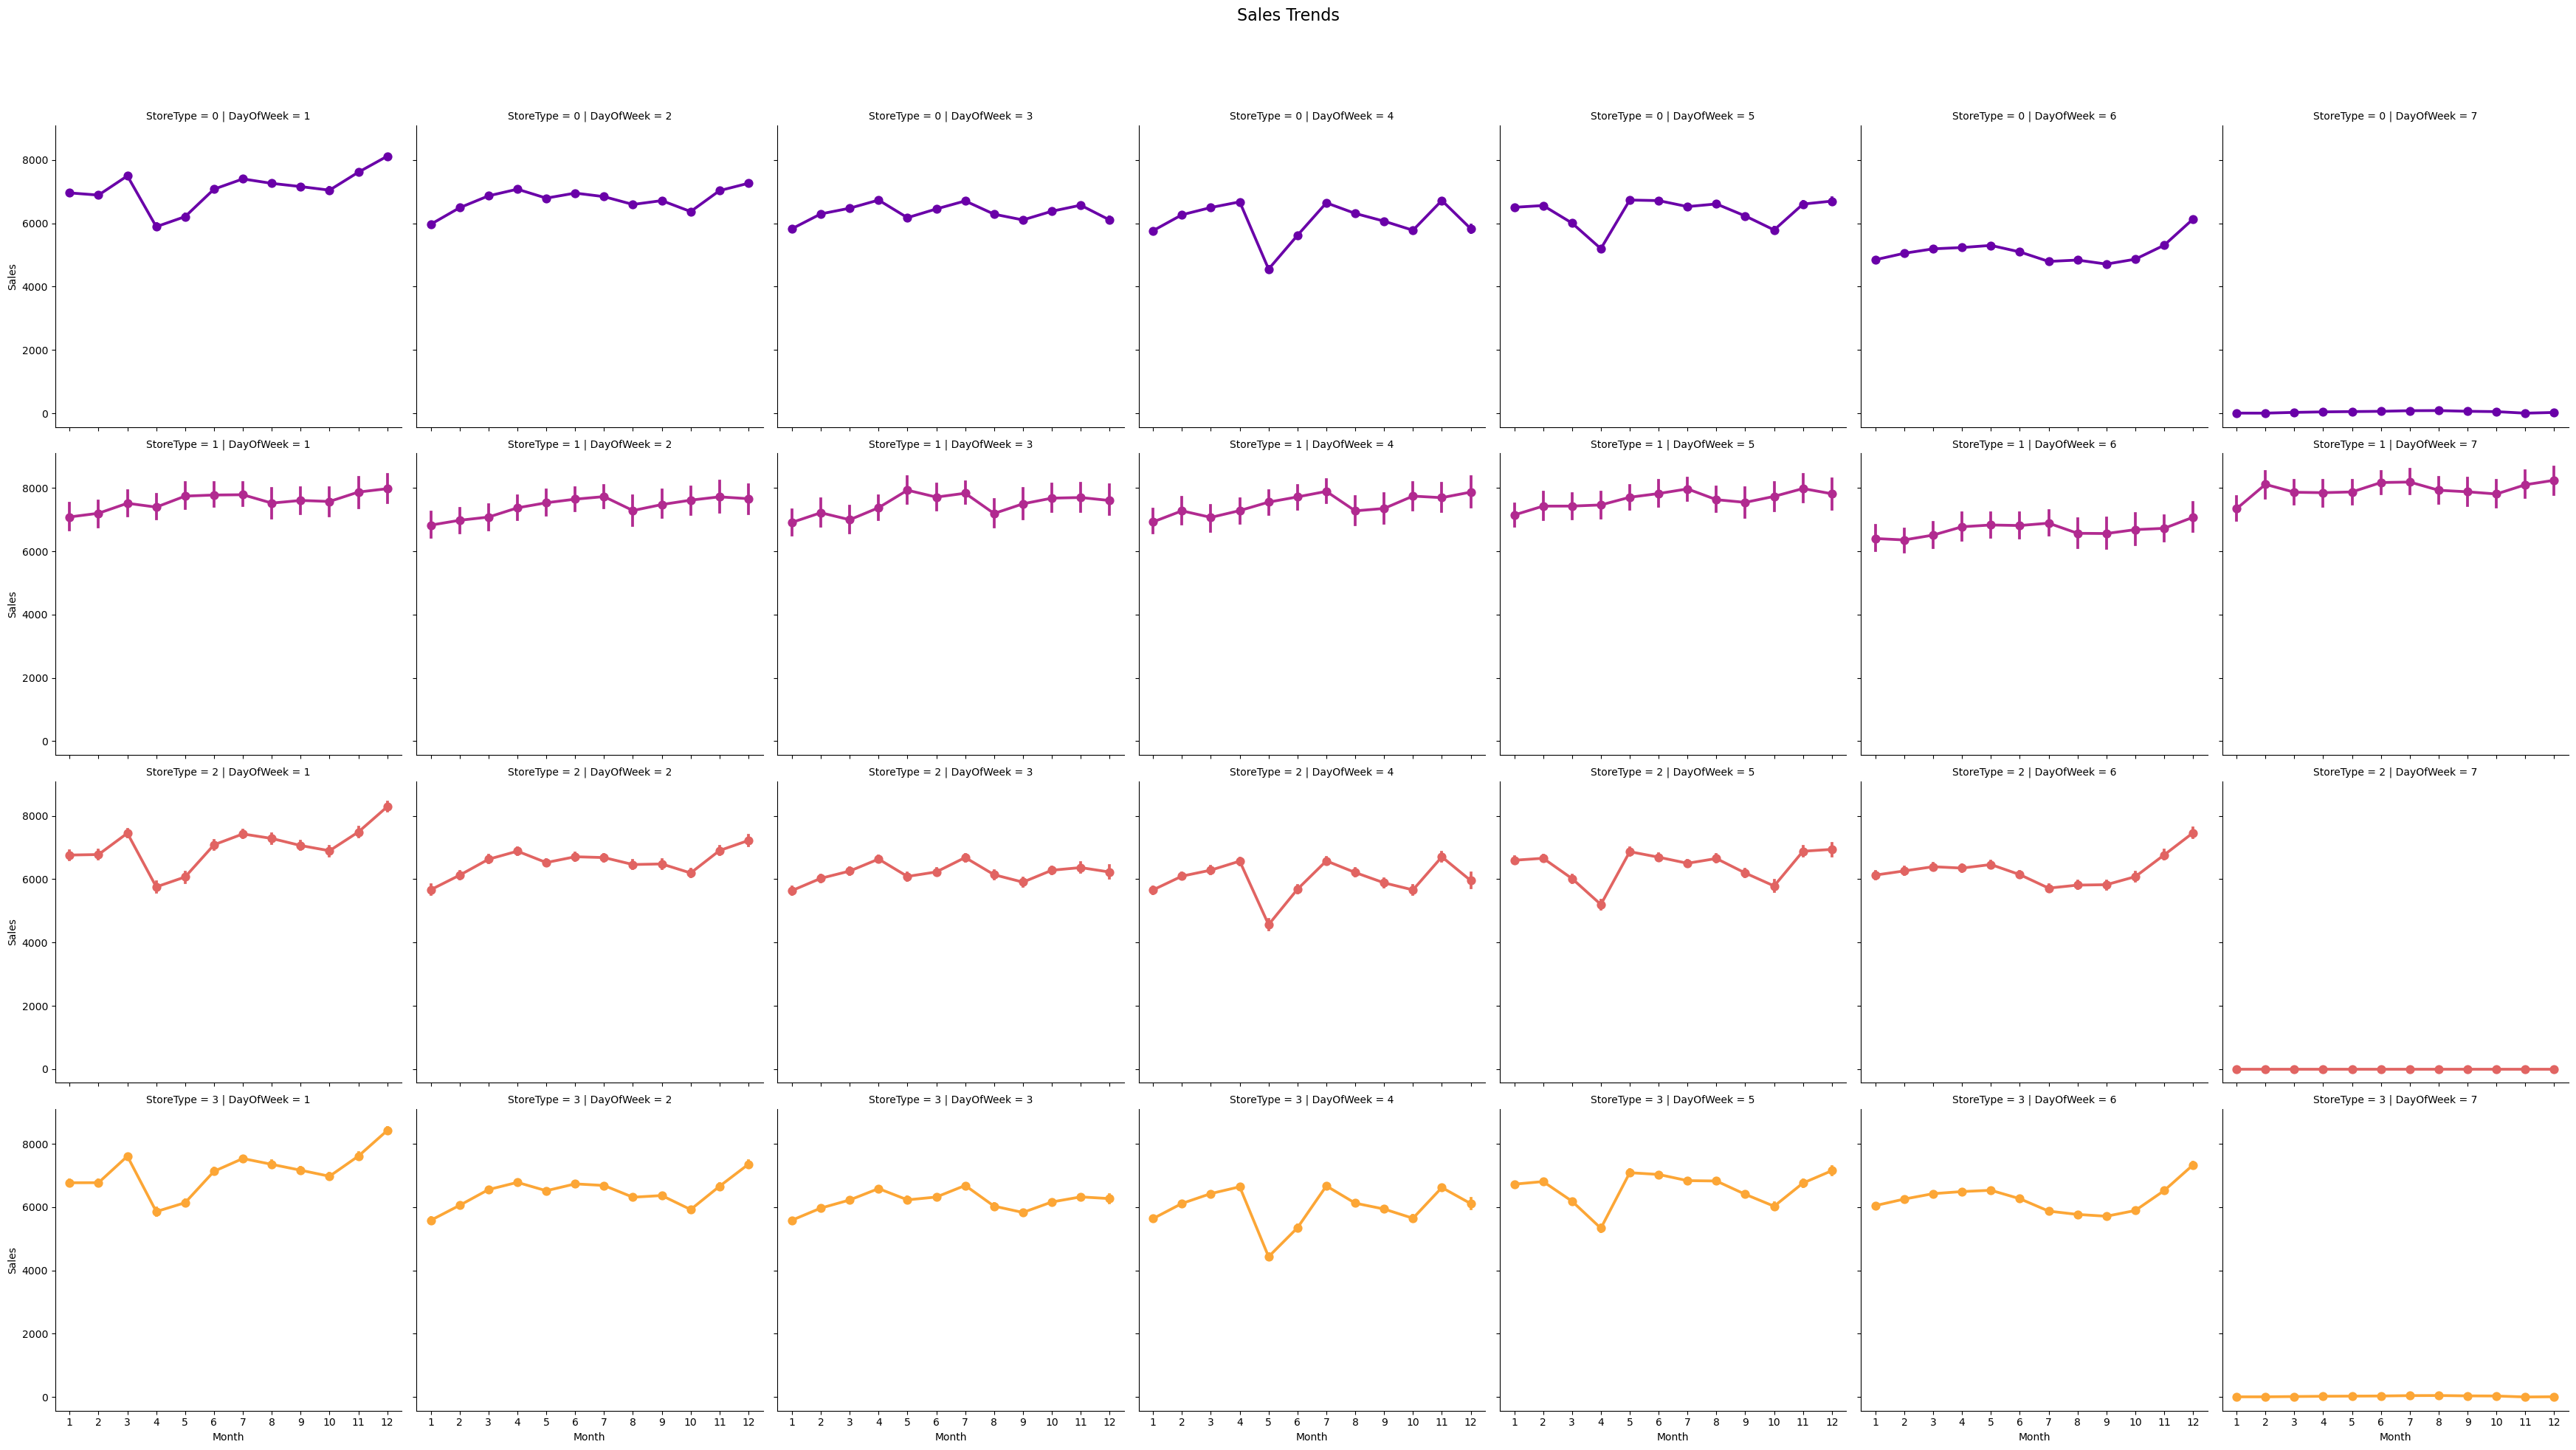

In [29]:
# customers
c = "blue"
sns.catplot(data=df_train_store, x='Month', y='Sales',
            col='DayOfWeek',  # per DayOfWeek in cols
            palette='plasma', hue='StoreType',
            row='StoreType',  # per store type in rows
            kind='point', color=c) 

plt.subplots_adjust(top=0.9)
plt.suptitle('Sales Trends', fontsize=16)
plt.show()

We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType B are closed on Sundays only from October to December.

In [32]:
# stores which are opened on Sundays
df_train_store[(df_train_store.Open == 1) & (df_train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

In [33]:
# competition open time (in months)
df_train_store['CompetitionOpen'] = 12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear) + \
        (df_train_store.Month - df_train_store.CompetitionOpenSinceMonth)
    
# Promo open time
df_train_store['PromoOpen'] = 12 * (df_train_store.Year - df_train_store.Promo2SinceYear) + \
        (df_train_store.WeekOfYear - df_train_store.Promo2SinceWeek) / 4.0

In [34]:
# replace NA's by 0
df_train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
df_train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
0,5388.581349,603.207098,12882.592255,127.272175
1,7446.566203,753.116425,17264.621605,173.660202
2,5485.973151,632.662124,12128.625157,126.270579
3,5507.903922,500.352335,10397.346995,142.889026


The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.

### Correlational Analysis

Adding new variables to the data is done, so now we can check the overall correlations by plotting the seaborn heatmap:

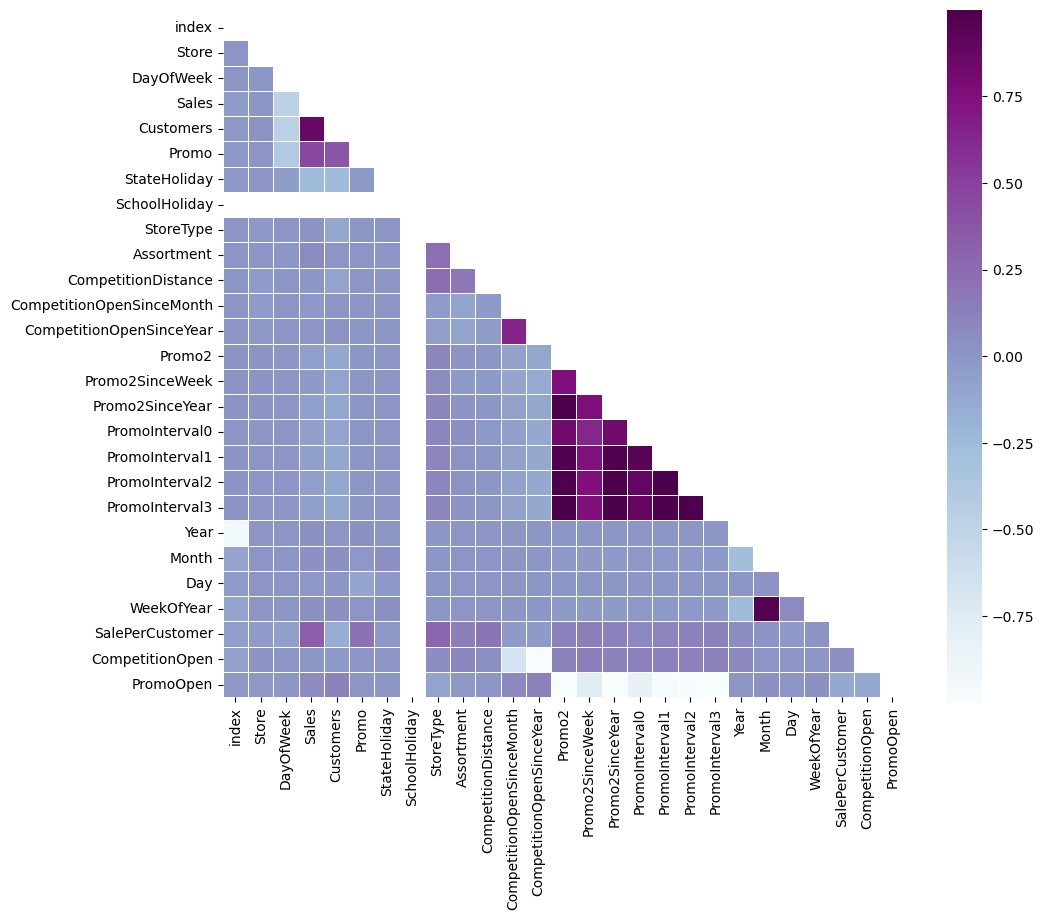

In [35]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = df_train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_all, dtype=bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

As mentioned before, we have a strong positive correlation between the amount of Sales and Customers of a store. We can also observe a positive correlation between the fact that the store had a running promotion (Promo equal to 1) and amount of Customers.

However, as soon as the store continues a consecutive promotion (Promo2 equal to 1) the number of Customers and Sales seems to stay the same or even decrease, which is described by the pale negative correlation on the heatmap. The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

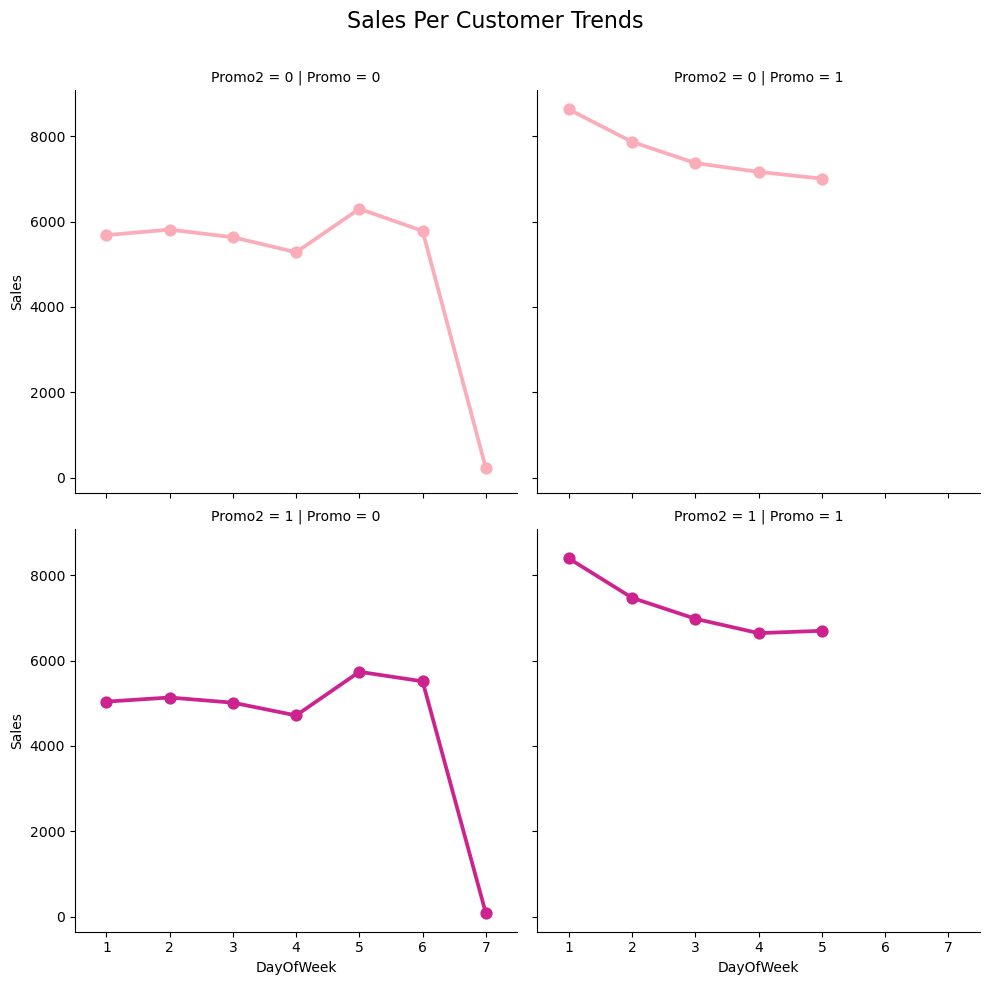

In [36]:
# Create the catplot to visualize "Sales" per customer trends
sns.catplot(data=df_train_store, x='DayOfWeek', y='Sales',
            col='Promo', row='Promo2',
            hue='Promo2', palette='RdPu',
            kind='point')

# Customize the plot (optional)
plt.subplots_adjust(top=0.9) 
plt.suptitle('Sales Per Customer Trends', fontsize=16)
plt.show()

There are several things here:

* In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to peak on Sunday (!). Though we should note that StoreType C doesn't work on Sundays. So it is mainly data from StoreType A, B and D.
* On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also prooved by the blue pale area on the heatmap above.

In [37]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]
SH_train = df_train_store.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
SH_train.columns = ['count']
SH_train = SH_train.reset_index()
SH_train["StateHoliday"] = SH_train["StateHoliday"].apply(lambda x: state_holidays[x])
SH_train

,StateHoliday,count
0,Normal day,986159
1,Public holiday,20260
2,Easter holiday,6690
3,Christmas,4100


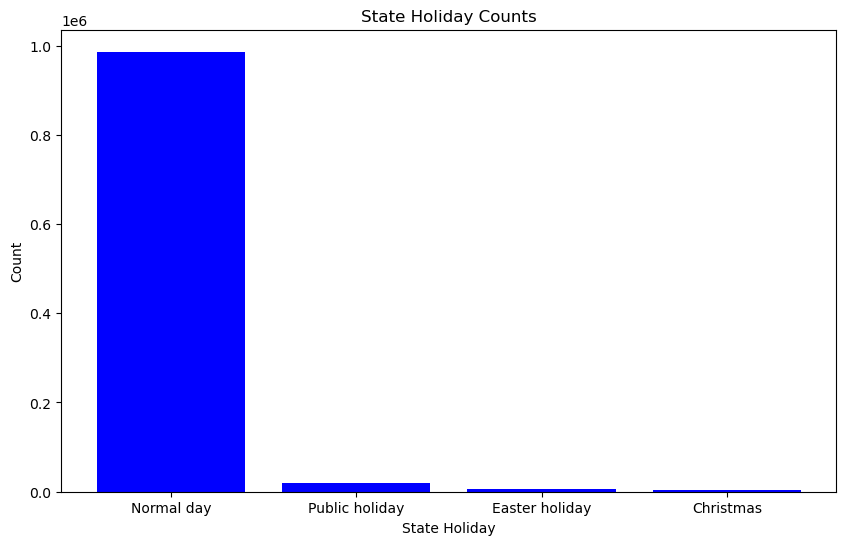

In [38]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]

# Group by 'StateHoliday' and aggregate count
SH_train = train_data.groupby(['StateHoliday']).size().reset_index(name='count')

# Map the StateHoliday index to corresponding names
SH_train["StateHoliday"] = SH_train["StateHoliday"].apply(lambda x: state_holidays[int(x)])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(SH_train["StateHoliday"], SH_train["count"], color='blue')
plt.xlabel('State Holiday')
plt.ylabel('Count')
plt.title('State Holiday Counts')
plt.show()

In [39]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]
SH_test = test_data.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
SH_test.columns = ['count']
SH_test = SH_test.reset_index()
SH_test["StateHoliday"] = SH_test["StateHoliday"].apply(lambda x: state_holidays[x])
SH_test

,StateHoliday,count
0,Normal day,40908
1,Public holiday,180


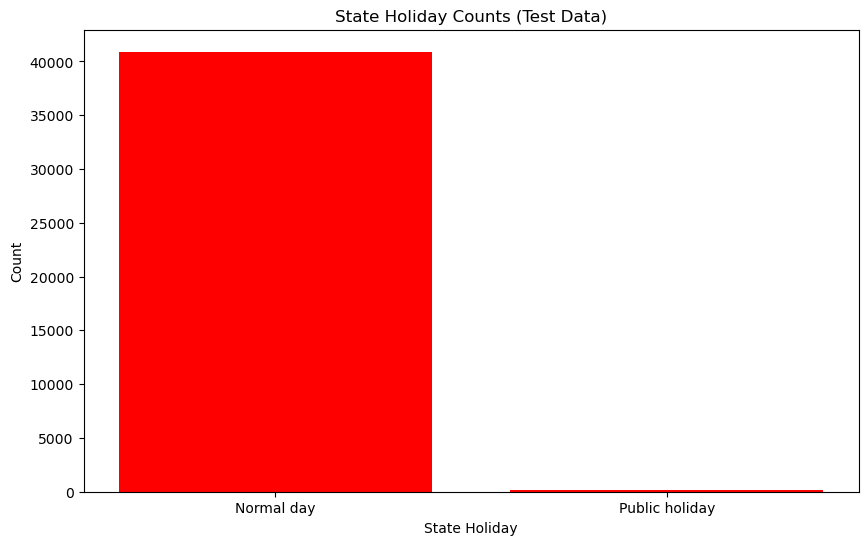

In [40]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]

# Group by 'StateHoliday' and aggregate count
SH_test = test_data.groupby(['StateHoliday']).size().reset_index(name='count')

# Map the StateHoliday index to corresponding names
SH_test["StateHoliday"] = SH_test["StateHoliday"].apply(lambda x: state_holidays[int(x)])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(SH_test["StateHoliday"], SH_test["count"], color='red')
plt.xlabel('State Holiday')
plt.ylabel('Count')
plt.title('State Holiday Counts (Test Data)')
plt.show()

As we can see there is a clear difference when it comes to the distribution of holidays betweeen train and test data! Easter and Christmas are not exist in the test data

### Task-1 Exploration of customer purchasing behavior

##### ●	Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [41]:
# 'Promo' is the column indicating promotions (1 for active, 0 for not active)

# Count the number of promotions in the training set
train_promotions = train_data['Promo'].value_counts()

# Count the number of promotions in the test set
test_promotions = test_data['Promo'].value_counts()

# Print the promotion distribution in the training set
print("Promotion distribution in the training set:")

print(train_promotions)

# Print the promotion distribution in the test set
print("Promotion distribution in the test set:")
print(test_promotions)

Promotion distribution in the training set:
0    629129
1    388080
Name: Promo, dtype: int64
Promotion distribution in the test set:
0    24824
1    16264
Name: Promo, dtype: int64


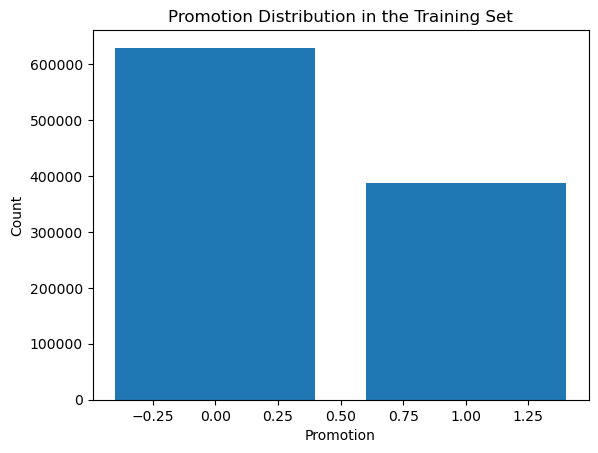

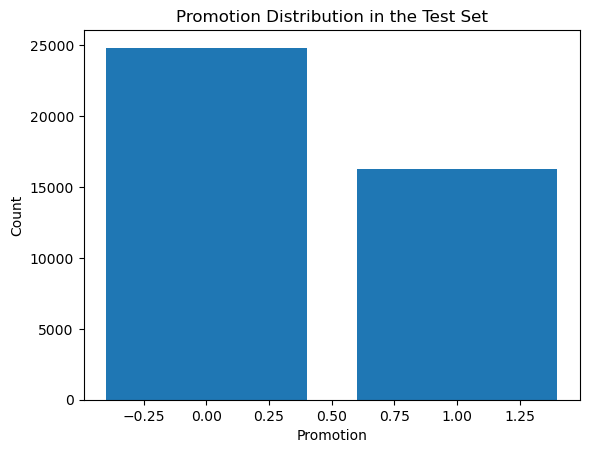

In [42]:
# Create a bar graph for the promotion distribution in the training set
plt.bar(train_promotions.index, train_promotions.values)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion Distribution in the Training Set')
plt.show()


# Create a bar graph for the promotion distribution in the test set
plt.bar(test_promotions.index, test_promotions.values)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion Distribution in the Test Set')
plt.show()

The distribution is just the same for the training and test data between not participating = 0 and participating = 1 for promotions


Insight:-> The distributiuon of promo over on training set is greater than the promo distribution over test set

#### ●	Check & compare sales behavior before, during and after holidays

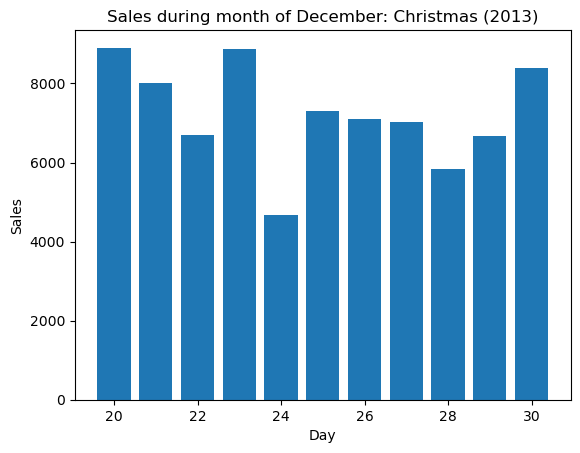

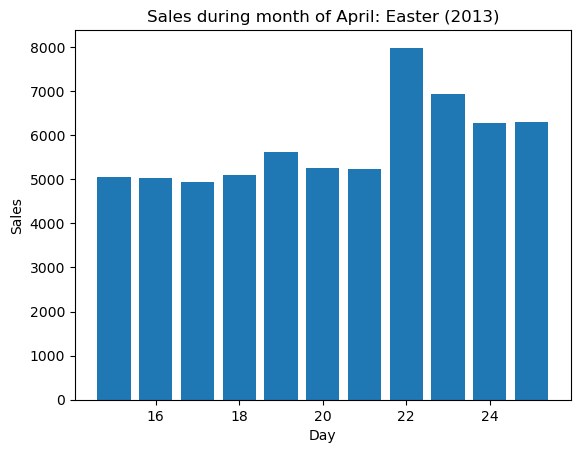

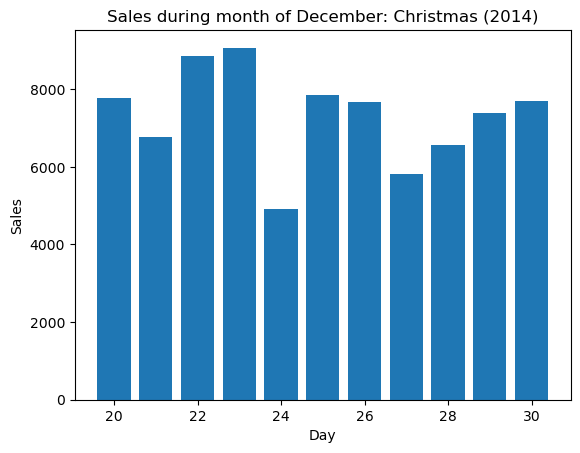

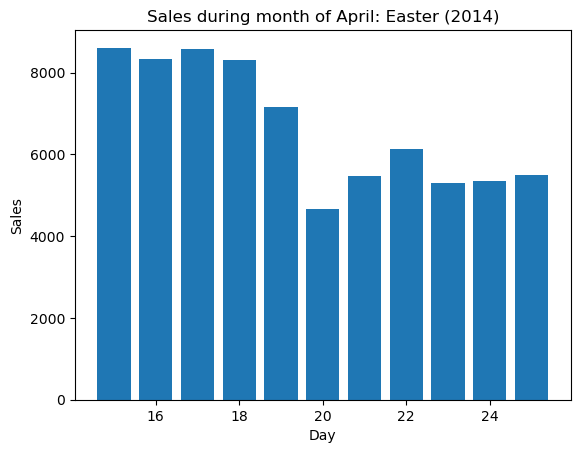

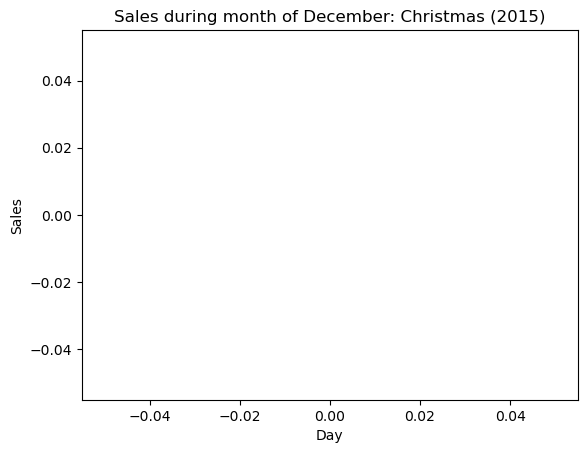

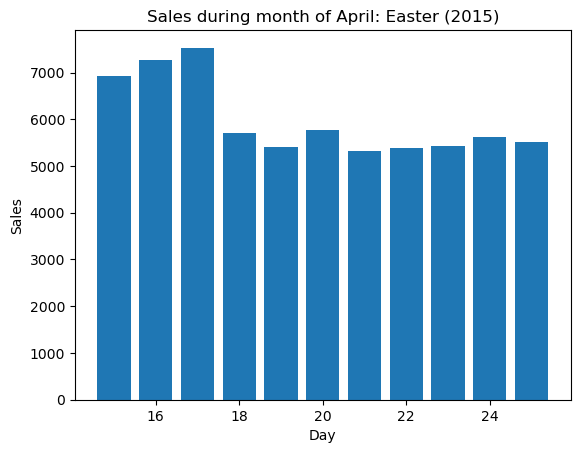

In [43]:
import matplotlib.pyplot as plt

# Years of interest
years = [2013, 2014, 2015]

# Month and day for Christmas and Easter
christmas_month = 12
easter_month = 4
christmas_day_range = (20, 30)
easter_day_range = (15, 25)

# Iterate over each year
for year in years:
    # Filter data for the specific year, open stores only
    open_store = df_train_store[(df_train_store['Open'] == 1) & (df_train_store['Year'] == year)]

    # Filter data for Christmas month
    christmas_data = open_store[(open_store['Month'] == christmas_month) & 
                                (open_store['Day'] >= christmas_day_range[0]) & 
                                (open_store['Day'] <= christmas_day_range[1])]
    
    # Filter data for Easter month
    easter_data = open_store[(open_store['Month'] == easter_month) & 
                             (open_store['Day'] >= easter_day_range[0]) & 
                             (open_store['Day'] <= easter_day_range[1])]

    # Calculate mean sales for Christmas and Easter
    christmas_mean_sales = christmas_data[['Day', 'Sales']].groupby('Day').mean()
    easter_mean_sales = easter_data[['Day', 'Sales']].groupby('Day').mean()

    # Plotting sales around Christmas
    plt.bar(christmas_mean_sales.index, christmas_mean_sales['Sales'])
    plt.xlabel('Day')
    plt.ylabel('Sales')
    plt.title(f'Sales during month of December: Christmas ({year})')
    plt.show()

    # Plotting sales around Easter
    plt.bar(easter_mean_sales.index, easter_mean_sales['Sales'])
    plt.xlabel('Day')
    plt.ylabel('Sales')
    plt.title(f'Sales during month of April: Easter ({year})')
    plt.show()

Insight:-> there are more sales before and after the Holidays when it compared to holidays sales

### Find out any seasonal (Christmas, Easter etc) purchase behaviours,


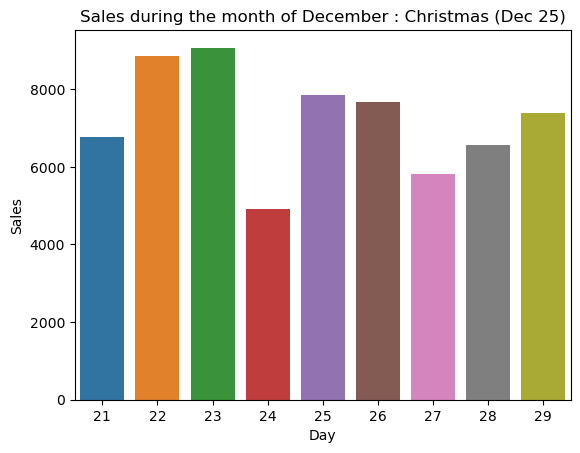

In [44]:
# Filter the open stores in 2014

open_store = df_train_store[(df_train_store.Open == 1) & (df_train_store.Year == 2014)]

# set the month of christmas
christmass_month = 12

# Filter the data for the christmas month
christmass_month = open_store[open_store.Month == christmass_month]

# Filter the data for the days around  Christmas
around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]

# Calculate the average sales for each day around  Christmas
average_sales = around_christmas[['Day','Sales']].groupby('Day').mean()

# Plot the average sales for each day around Christmas
sns.barplot(x=average_sales.index,y= average_sales['Sales'])

# Set the title of the plot
plt.title("Sales during the month of December : Christmas (Dec 25)")

# Display the plot
plt.show()

### What can you say about the correlation between sales and number of customers?


In [45]:
# Correlation between Sales and number of customers
df_train_store[['Customers','Sales']].corr()

,Customers,Sales
Customers,1.000000,0.872695
Sales,0.872695,1.000000


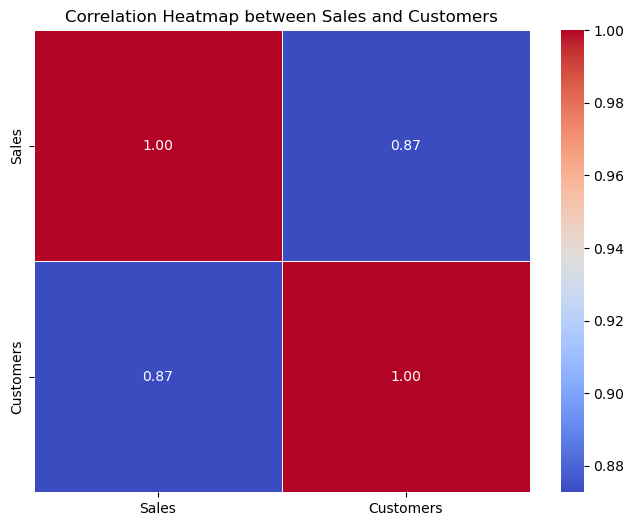

In [46]:
correlation_matrix = df_train_store[['Sales', 'Customers']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Sales and Customers')
plt.show()

The correlation coefficient between 'Customers' and 'Sales' is 0.894711.
This value is close to 1, indicating a strong positive correlation between the number of customers and sales.

creating scatter plots to visually observe the relationship between 'Customers' and 'Sales.' Each point on the plot represents a data point, and the trend can provide additional insights.

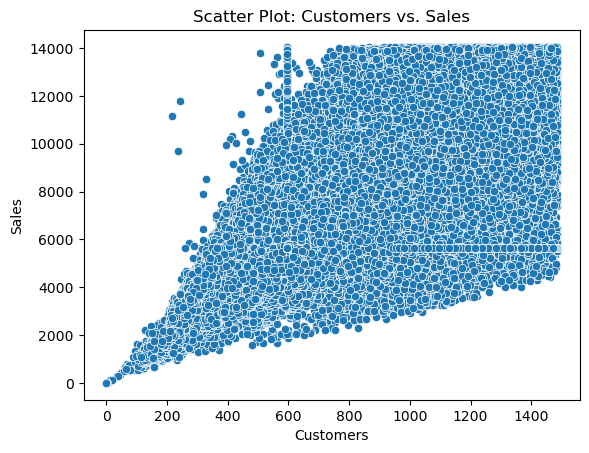

In [47]:
sns.scatterplot(x='Customers', y='Sales', data=df_train_store)
plt.title('Scatter Plot: Customers vs. Sales')
plt.show()

In the scatter plot, we observe a clear upward trend, it supports the positive correlation.

### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


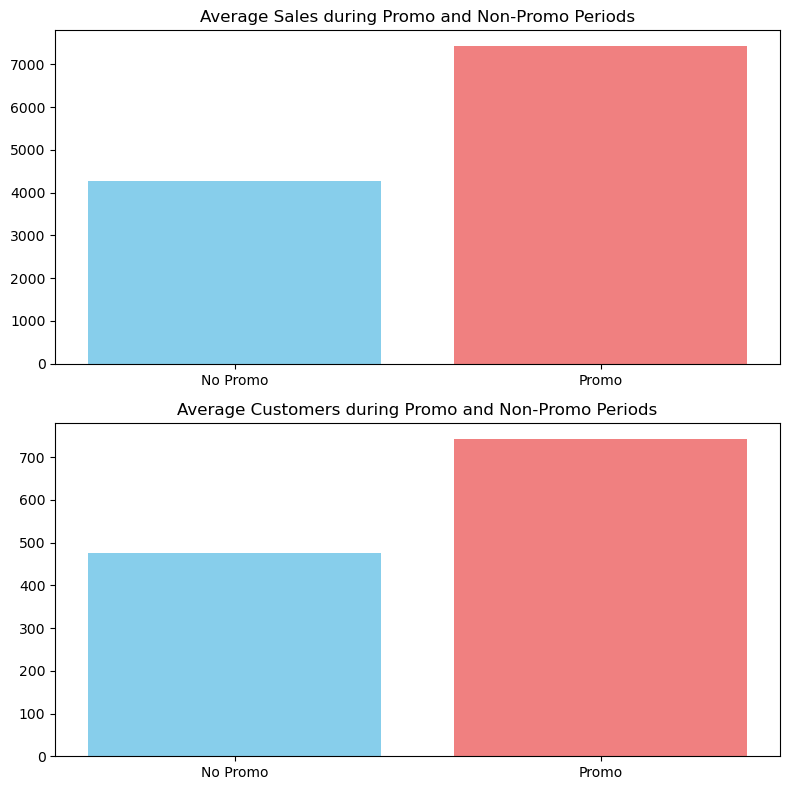

              Promo     Sales  Customers
Promo      1.000000  0.460861   0.372456
Sales      0.460861  1.000000   0.872695
Customers  0.372456  0.872695   1.000000


In [48]:
promo_data = df_train_store.groupby('Promo')[['Sales', 'Customers']].mean().reset_index()

# Plotting average sales and customers during promo and non-promo periods
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Average Sales
axes[0].bar(promo_data['Promo'], promo_data['Sales'], color=['skyblue', 'lightcoral'])
axes[0].set_title('Average Sales during Promo and Non-Promo Periods')
axes[0].set_xticks(promo_data['Promo'])
axes[0].set_xticklabels(['No Promo', 'Promo'])

# Average Customers
axes[1].bar(promo_data['Promo'], promo_data['Customers'], color=['skyblue', 'lightcoral'])
axes[1].set_title('Average Customers during Promo and Non-Promo Periods')
axes[1].set_xticks(promo_data['Promo'])
axes[1].set_xticklabels(['No Promo', 'Promo'])

plt.tight_layout()
plt.show()

promo_correlation = df_train_store[['Promo', 'Sales', 'Customers']].corr()
print(promo_correlation)


Insight:-> Working on promotion increase the customers base and Increase Sales.

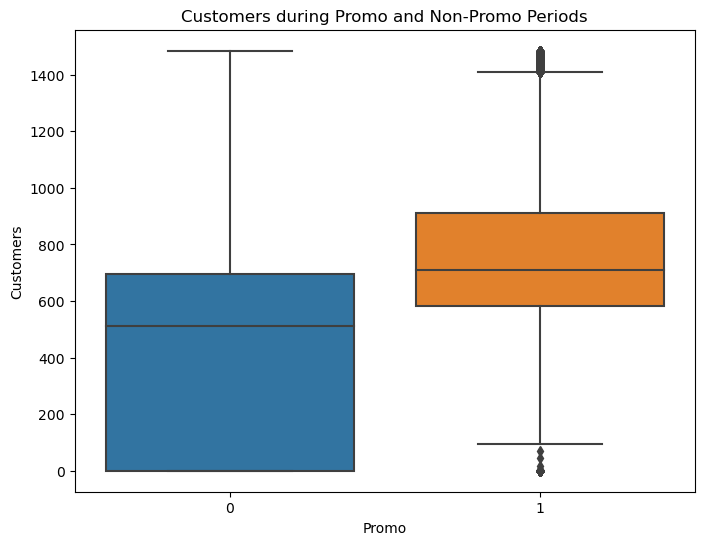

In [49]:
existing_customers_data = df_train_store[df_train_store['Promo'] == 1]['Customers']
non_promo_customers_data = df_train_store[df_train_store['Promo'] == 0]['Customers']


# Visualization: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Promo', y='Customers', data=df_train_store)
plt.title('Customers during Promo and Non-Promo Periods')
plt.xlabel('Promo')
plt.ylabel('Customers')
plt.show()

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


Number of stores with less than 5143.545555555555 mean sales: 112


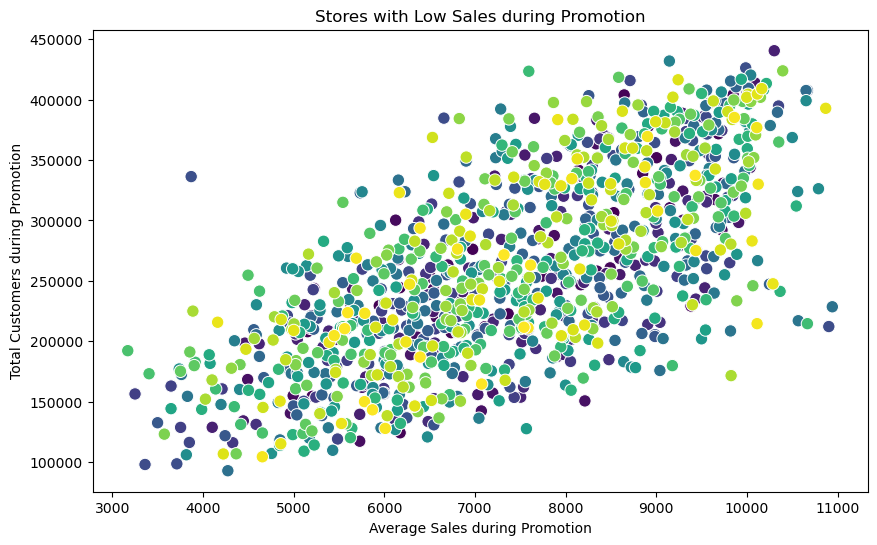

In [50]:

# Promo should be deployed on stores which have __ sales and __ customers (more, **less)?

# Filter stores with promotions
stores_with_promo = df_train_store[df_train_store['Promo'] == 1]

# Calculate mean sales and total customers per store
store_stats = stores_with_promo.groupby('Store').agg({'Sales': 'mean', 'Customers': 'sum'})

# Identify stores with low sales (e.g., bottom 10%)
low_sales_threshold = store_stats['Sales'].quantile(0.1)
low_sales_stores = store_stats[store_stats['Sales'] <= low_sales_threshold]

# Print the number of stores with low sales
print(f"Number of stores with less than {low_sales_threshold} mean sales: {low_sales_stores.shape[0]}")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_stats, x='Sales', y='Customers', hue=store_stats.index, palette='viridis', s=80)
plt.title('Stores with Low Sales during Promotion')
plt.xlabel('Average Sales during Promotion')
plt.ylabel('Total Customers during Promotion')
plt.legend().remove()  # Remove legend for better visibility
plt.show()


Number of stores with less than 5143.545555555555 mean sales: 112

The output indicates that there are 112 stores which will need more promotion to increase the sales

#### Trends of customer behavior during store open and closing times

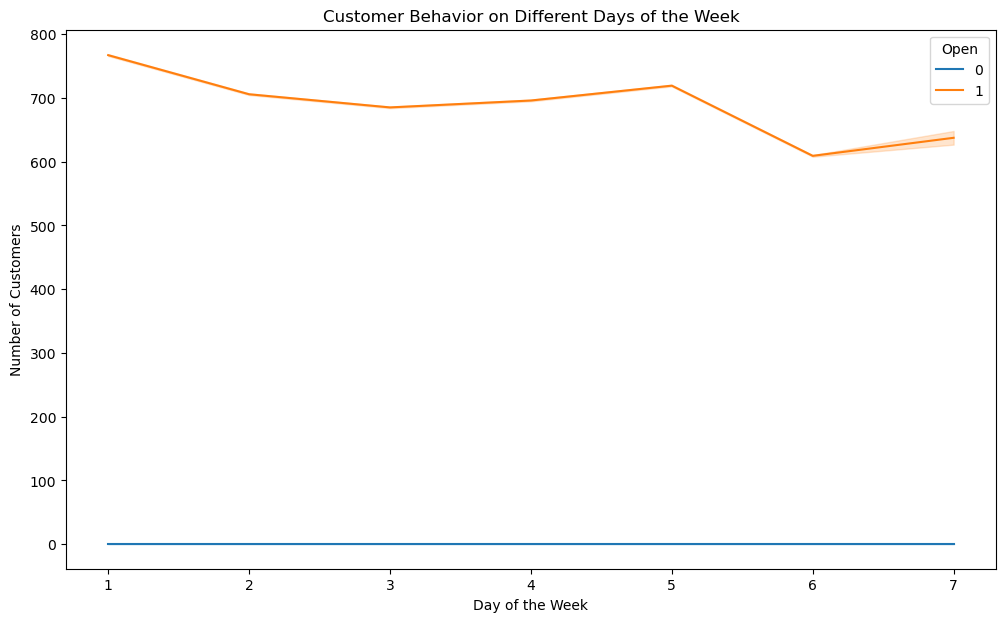

In [51]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_train_store, x="DayOfWeek", y="Customers", hue="Open")
plt.title('Customer Behavior on Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.show()

Insight:-> Number of customers increase when the store is closed.

#### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

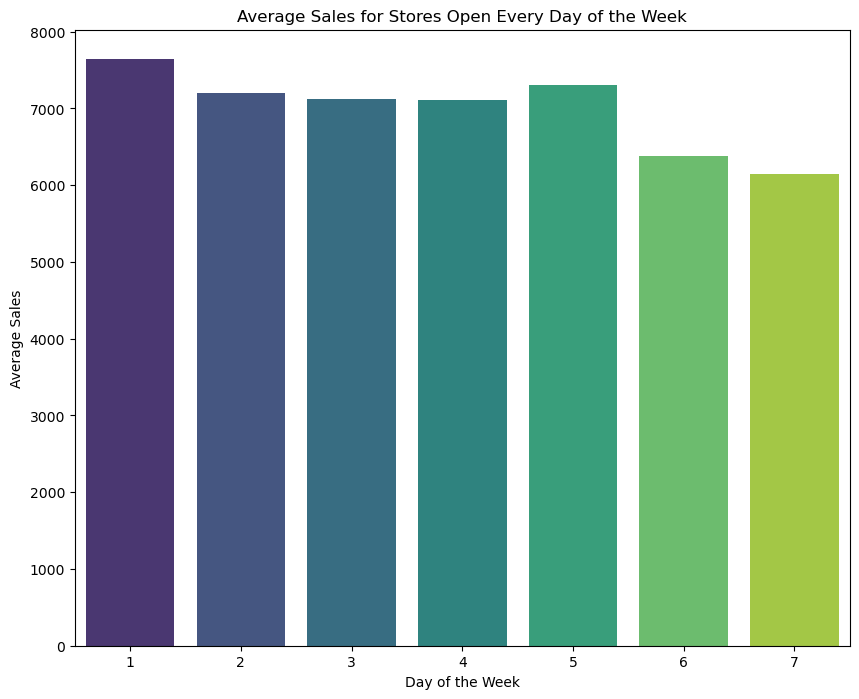

Stores That Work Every Day of the Week: 33


In [52]:
open_stores = df_train_store[df_train_store.Open == 1]

# Count the number of unique days each store is open
each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()

# Identify stores open all week (7 days)
all_week_stores = each_day[each_day.DayOfWeek == 7]
stores_id = all_week_stores.reset_index()['Store']

# Filter data for stores open all week
get_stores = open_stores[open_stores.Store.isin(set(stores_id))]
get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

# Calculate average sales on each day of the week
week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

# Plotting the average sales on each day using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=week_sales, x="DayOfWeek", y="Sales", palette='viridis')
plt.title('Average Sales for Stores Open Every Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

# Print the number of stores open all week
print(f'Stores That Work Every Day of the Week: {all_week_stores.shape[0]}')

Insight :-> we have about 33 stores that work on all weekdays, and the sales on week ends show rise from Saturday to sunday

#### Check how the assortment type affects sales

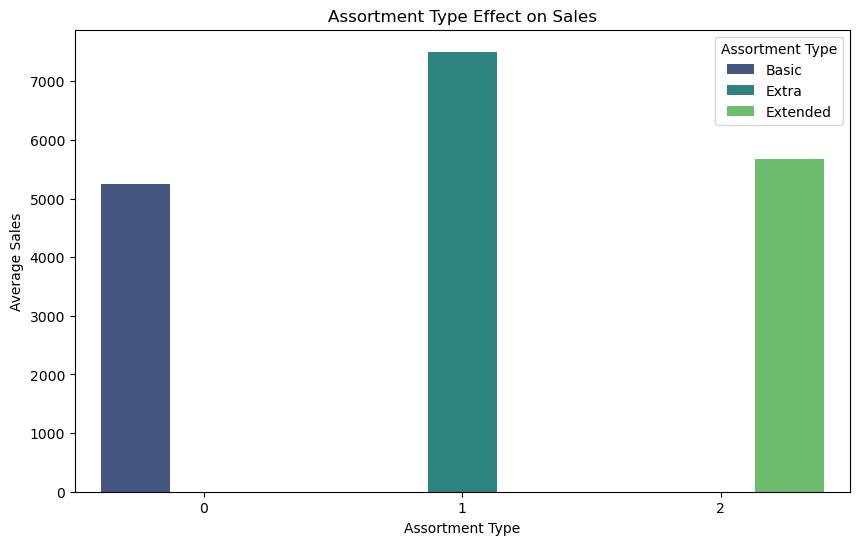

In [53]:
assortment = df_train_store.groupby('Assortment').agg({'Sales': 'mean', 'Customers': 'sum'}).reset_index()

assortment_mapping = {'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}

# Create a bar plot for both Sales and Customers using catplot with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train_store, x='Assortment', y='Sales', hue='Assortment', ci=None, palette='viridis')
plt.title('Assortment Type Effect on Sales')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.legend(title='Assortment Type', labels=[assortment_mapping[key] for key in assortment_mapping.keys()])

plt.show()



#### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

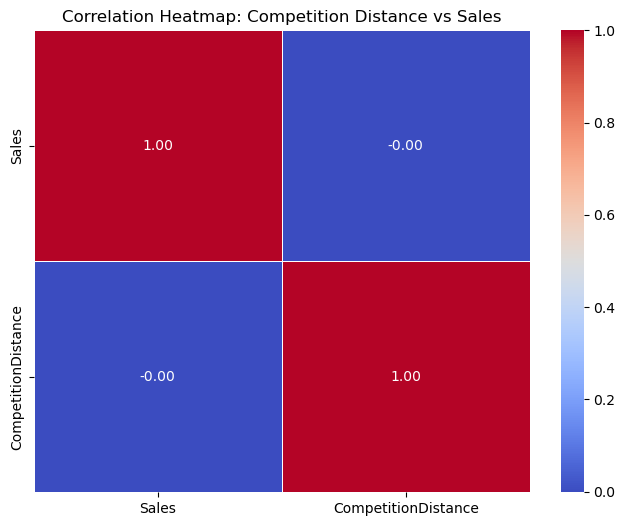

In [54]:
# Create a correlation matrix
correlation_matrix = df_train_store[[ 'Sales','CompetitionDistance']].corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Competition Distance vs Sales')
plt.show()

 Insight :-> The more the closer the stores the higher the sales, and the more the distant the lower the sales.

#### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

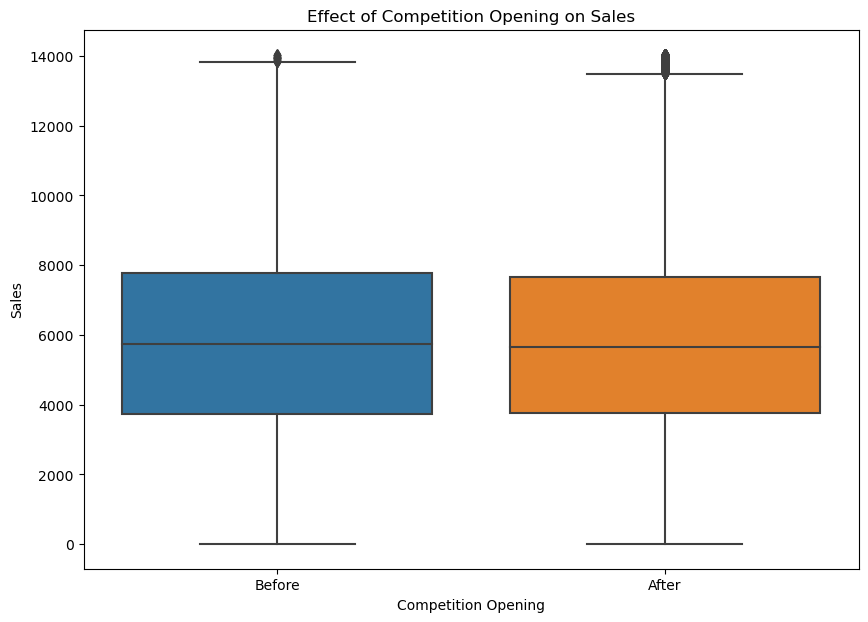

In [55]:
# Filter the dataframe to include only rows with non-null CompetitionOpenSinceMonth
has_open_competition_df = df_train_store[df_train_store['CompetitionOpenSinceMonth'].notnull()]

# Convert CompetitionOpenSinceYear and CompetitionOpenSinceMonth columns to integer type
has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int")

# Filter rows where the Year is less than CompetitionOpenSinceYear and the Month is less than CompetitionOpenSinceMonth
sales_before_competition_open = has_open_competition_df[(has_open_competition_df["Year"] < has_open_competition_df["CompetitionOpenSinceYear"]) & (has_open_competition_df["Month"] < has_open_competition_df["CompetitionOpenSinceMonth"])]

# Filter rows where the Year is greater than or equal to CompetitionOpenSinceYear and the Month is greater than or equal to CompetitionOpenSinceMonth
sales_after_competition_open = has_open_competition_df[(has_open_competition_df["Year"] >= has_open_competition_df["CompetitionOpenSinceYear"]) & (has_open_competition_df["Month"] >= has_open_competition_df["CompetitionOpenSinceMonth"])]

# Add a new column "CompetitionBefore" with the value "Before" for rows in sales_before_competition_open dataframe
sales_before_competition_open["CompetitionBefore"] = "Before"

# Add a new column "CompetitionBefore" with the value "After" for rows in sales_after_competition_open dataframe
sales_after_competition_open["CompetitionBefore"] = "After"

# Concatenate the sales_before_competition_open and sales_after_competition_open dataframes
competition_sales_data = pd.concat([sales_before_competition_open, sales_after_competition_open])

# Create a boxplot to visualize the effect of competition opening on sales
plt.figure(figsize=(10, 7))
sns.boxplot(x='CompetitionBefore', y='Sales', data=competition_sales_data)
plt.xlabel('Competition Opening')
plt.ylabel('Sales')
plt.title('Effect of Competition Opening on Sales')
plt.show()


Observations: Number of sales increase when the competitors are opened.

### conclusion of EDA

* To asses the performance of a store type, we have made visualizations to see the sales per customer and we get the store that makes its customers spend the most on average.

* Let's compare first the total sales of each store type, its average sales and then see how it changes when we add the customers to the equation

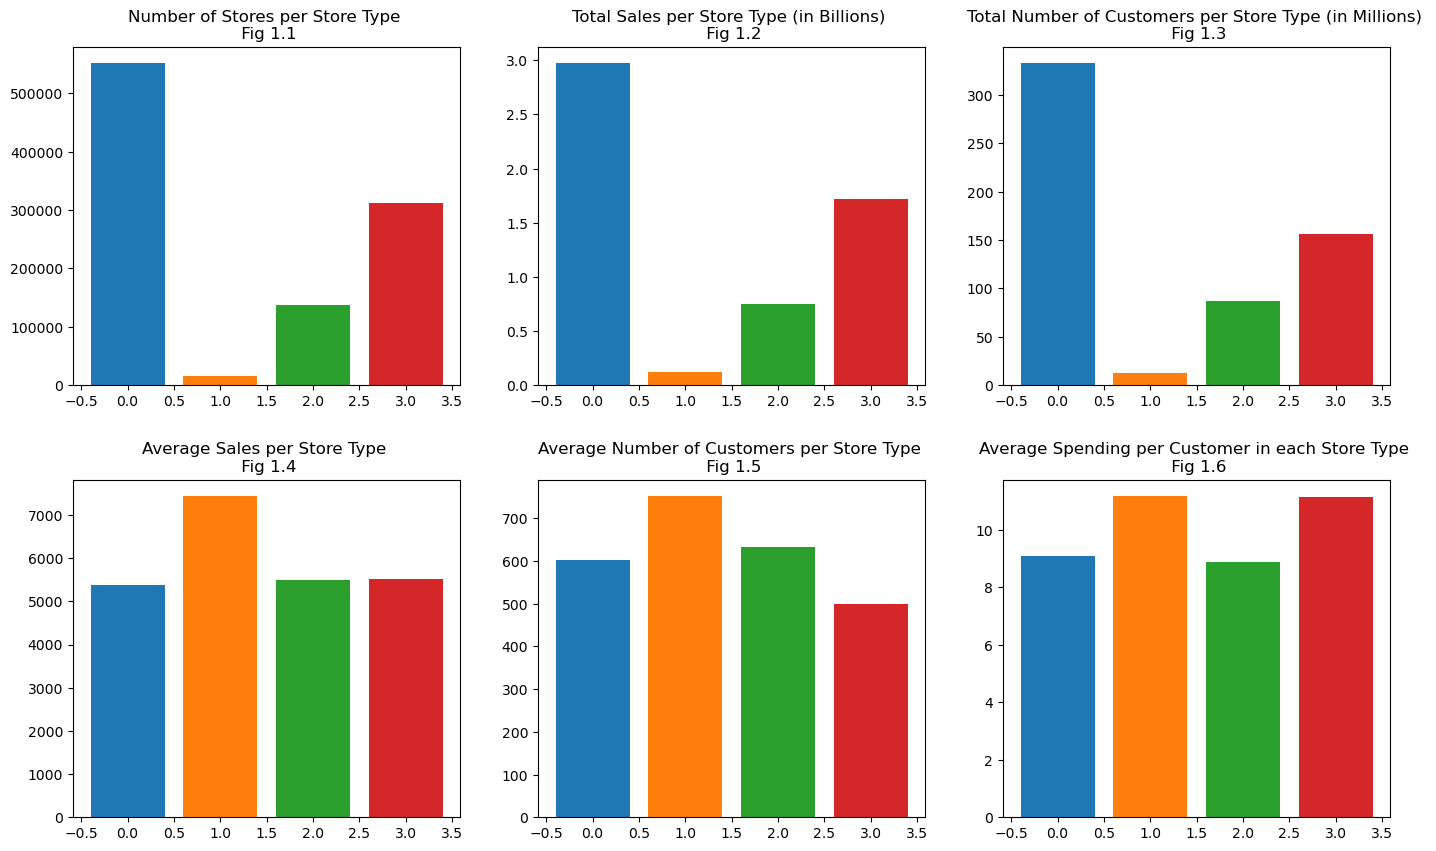

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adding salespercustomer column
df_train_store['SalesperCustomer'] = df_train_store['Sales'] / df_train_store['Customers']

# Set color palette
palette = sns.color_palette(n_colors=4)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(17, 10))
plt.subplots_adjust(hspace=0.28)

# Number of Stores per Store Type
axes[0, 0].bar(df_train_store.groupby(by="StoreType").count().Store.index, df_train_store.groupby(by="StoreType").count().Store, color=palette)
axes[0, 0].set_title("Number of Stores per Store Type \n Fig 1.1")

# Total Sales per Store Type (in Billions)
axes[0, 1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index, df_train_store.groupby(by="StoreType").sum().Sales / 1e9, color=palette)
axes[0, 1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")

# Total Number of Customers per Store Type (in Millions)
axes[0, 2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index, df_train_store.groupby(by="StoreType").sum().Customers / 1e6, color=palette)
axes[0, 2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")

# Average Sales per Store Type
axes[1, 0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index, df_train_store.groupby(by="StoreType").Sales.mean(), color=palette)
axes[1, 0].set_title("Average Sales per Store Type \n Fig 1.4")

# Average Number of Customers per Store Type
axes[1, 1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index, df_train_store.groupby(by="StoreType").Customers.mean(), color=palette)
axes[1, 1].set_title("Average Number of Customers per Store Type \n Fig 1.5")

# Average Spending per Customer in each Store Type
axes[1, 2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index, df_train_store.groupby(by="StoreType").SalesperCustomer.mean(), color=palette)
axes[1, 2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")

plt.show()


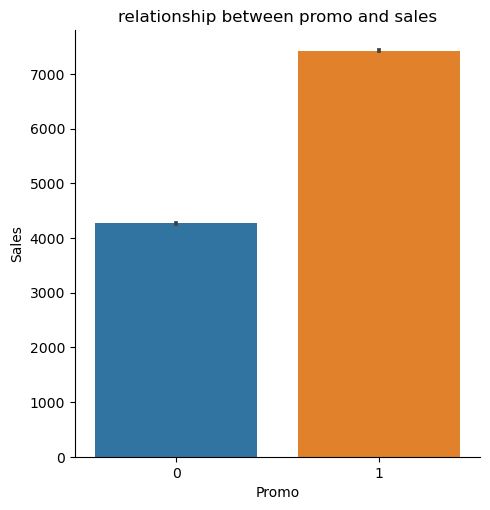

                sum
Promo              
1      2.879858e+09
0      2.684698e+09


In [57]:
#relationship between promo and sales
sns.catplot(x='Promo', y='Sales', data = df_train_store, kind='bar')
plt.title("relationship between promo and sales")
plt.show()

print(df_train_store.groupby(['Promo'], sort=False)['Sales'].agg(['sum']))

As it is expected, there is a strong positive correlation between sales and customers indicating that higher customers lead to more sales. Promo leads to higher sales but do not necessarily mean increase in customers from as seen from the table below that when there are no promo (‘0’) the number of customers are higher.

### conclusion 

* From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

* When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers. One assumption could be that if B has only 17 stores but such a high amount of average sales and customers that it is likely hyper Rossman branches whereas A would be smaller in size but much more present.

* StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest which means each customer will buy more since he knows there isn't a lot of similair shops around

*  Promo leads to higher sales but do not necessarily mean increase in customers 
 

#### Now we moves to perform Prediction of store sales !!!